# World Happiness Index, ¿de qué depende la felicidad?

En este proyecto se hace un análisis de la infromación recopilada en la base de datos del Índice Mundial de la Felicidad, en donde se despliega el puntaje de felicidad de 156 países en todo el mundo. A través de distintas variables establecidas en el reporte, se hará un análisis de cómo estas variables influyen en la felicidad percibida y cuál es la variable más significativa

# 1.- Se importan y descargan las librerías necesarias

In [1]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from statsmodels.formula.api import ols
from sklearn import linear_model

In [3]:
mpl.style.use(['seaborn-whitegrid'])

Se establece el estilo de gráficas que usaremos.

# 2.- Se importa la base de datos de nuestro Dataset

In [4]:
df = pd.read_excel('datasets/Happiness Index.xlsx',
                  engine = 'openpyxl')
df.head(2)

,Overall rank,Country or region,Continent,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,156,South Sudan,Africa,2.853,0.306,0.575,0.295,0.010,0.202,0.091
1,155,Central African Republic,Africa,3.083,0.026,0.000,0.105,0.225,0.235,0.035


La variable dependiente que se va a estudiar es la de 'Score', pues es el resultado final que deseamos estudiar. Las demás columnas son las variables que se pretende que expliquen y justifiquen el 'Score'.

# 3.- Se hace un histograma para observar la acumulación de datos generales.


Text(0.5, 0, 'Happiness score')

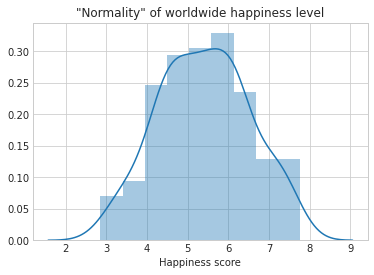

In [5]:
hist_score = sns.distplot(df.Score)
plt.title('"Normality" of worldwide happiness level')
plt.xlabel('Happiness score')

Se observa que, de todo el conjunto de datos, la mayoría de los puntajes de felicidad están entre el 4 y el 7, demostrando un ligero sesgo a la derecha.

# 4.- Número y tipo de variables

Ahora que sabemos nuestra variable dependiente, es momento de verificar cuáles y de qué tipo son las variables de nuestra base de datos.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Continent                     156 non-null    object 
 3   Score                         156 non-null    float64
 4   GDP per capita                156 non-null    float64
 5   Social support                156 non-null    float64
 6   Healthy life expectancy       156 non-null    float64
 7   Freedom to make life choices  156 non-null    float64
 8   Generosity                    156 non-null    float64
 9   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 12.3+ KB


Una vez tengamos esta información, es posible verificar el tipo de cada variable. Todas las variables numéricas son de tipo Float, pues tienen valores decimales. La única variable entera es la del 'Overall Rank', la cual únicamente funciona como un tipo de índice. Existen 2 variables categóricas que nos pueden ayudar a segmentar la información y estudiarla por partes, como los continentes o los países.

# 5.- ¿Qué descripción tiene nuestra variable de interés?

In [7]:
df.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


Obtener una descripción del desglose de datos de Score nos permite conocer los valores máximos, intermedios y mínimos, así como su distribución estándar y su promedio general.

# 6.- ¿Qué variable, por sí sola, tiene más correlación con la variable objetivo?

In [8]:
df['Country or region'] = df['Country or region'].astype('category').cat.codes
df['Continent'] = df['Continent'].astype('category').cat.codes

Como tenemos variables de tipo String, no se les puede insertar al cálculo del coeficiente de correlación, por lo que se les transforma en variables categóricas para que puedan ser consideradas en el cálculo.

In [9]:
var = ['Score','Country or region', 'Continent',
       'GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']
correlation = df[var].corr()
correlation

,Score,Country or region,Continent,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Score,1.000000,-0.023039,0.640309,0.793883,0.777058,0.779883,0.566742,0.075824,0.385613
Country or region,-0.023039,1.000000,-0.066936,0.021662,0.135603,-0.026412,0.041065,0.114529,0.029526
Continent,0.640309,-0.066936,1.000000,0.548918,0.575935,0.654999,0.230586,-0.103762,0.058903
GDP per capita,0.793883,0.021662,0.548918,1.000000,0.754906,0.835462,0.379079,-0.079662,0.298920
Social support,0.777058,0.135603,0.575935,0.754906,1.000000,0.719009,0.447333,-0.048126,0.181899
Healthy life expectancy,0.779883,-0.026412,0.654999,0.835462,0.719009,1.000000,0.390395,-0.029511,0.295283
Freedom to make life choices,0.566742,0.041065,0.230586,0.379079,0.447333,0.390395,1.000000,0.269742,0.438843
Generosity,0.075824,0.114529,-0.103762,-0.079662,-0.048126,-0.029511,0.269742,1.000000,0.326538
Perceptions of corruption,0.385613,0.029526,0.058903,0.298920,0.181899,0.295283,0.438843,0.326538,1.000000


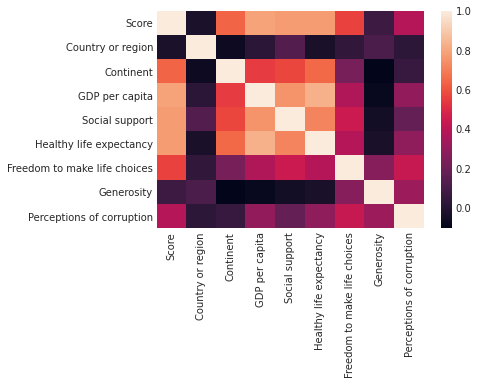

In [10]:
sns.heatmap(correlation)

Como se observa tanto en la tabla como en el mapa de calor, las variables con más correlación hacia el 'Score' de felicidad son las siguientes (de mayor a menor): GDP per capita, Healthy Life Expectancy, Social Support, Continent, Freedom to make life choices, Perceptions of corruption, Generosity, Country.

Debido a que los índices de correlación superiores a 0.6 son considerados como fuertes, las variables a tomar en cuenta de aquí en adelante son las que sean superiores a ese valor, como lo son: GDP per capita, Healthy Life Expectancy, Social Support, Continent

En consecuencia el modelo de regresión será: Score = b0 + (b1 x GDP per capita) + (b2 x Healthy Life Expectancy) + (b3 x Social Support) + (b4 x Continent)

# 7.- ¿Cómo es la correlación entre las variables y 'Score'?
Se realiza un diagrama de dispersión de cada variable vs Score para observar el comportamiento de la variable dependiente conforme al cambio de la variable independiente.

Text(0.5, 1.0, 'Continent vs Score')

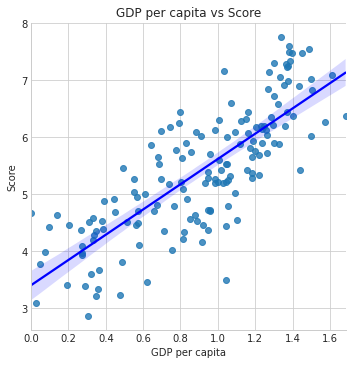

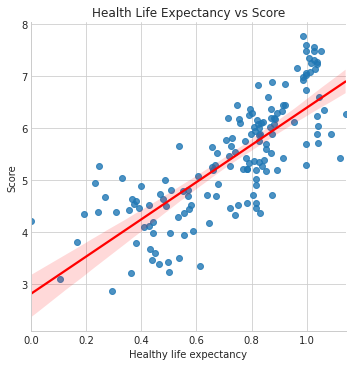

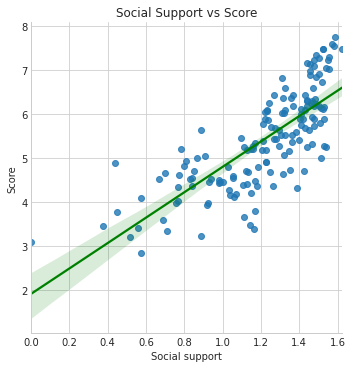

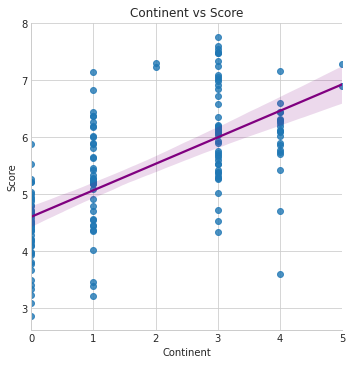

In [11]:
sns.lmplot(x = 'GDP per capita', y = 'Score', data = df, line_kws={'color': 'blue'})
plt.title('GDP per capita vs Score')

sns.lmplot(x = 'Healthy life expectancy', y = 'Score', data = df, line_kws={'color': 'red'})
plt.title('Health Life Expectancy vs Score')

sns.lmplot(x = 'Social support', y = 'Score', data = df, line_kws={'color': 'green'})
plt.title('Social Support vs Score')

sns.lmplot(x = 'Continent', y = 'Score', data = df, line_kws={'color': 'purple'})
plt.title('Continent vs Score')

Como se puede observar en las 4 gráficas, el puntaje 'Score' depende en buena medida de todas las variables mencionadas. Existe una correlación fuerte positiva entre las variables independientes con la dependiente, por lo que sí se ve afectado el 'Score' dependiendo del valor de la variable independiente.

# 8.- ¿Existen valores atípicos?
Se hará un Boxplot para cada variable y determinar si existen valores atípicos que puedan sesgar de manera incorrecta nuestros datos.

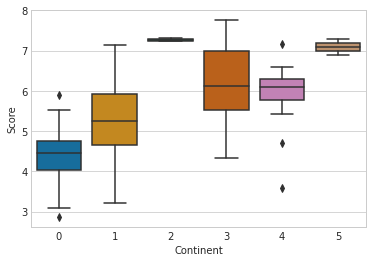

In [12]:
sns.boxplot(y='Score', x='Continent', 
                 data=df, 
                 palette="colorblind")

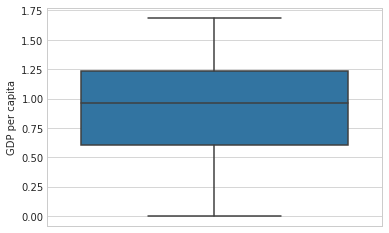

In [13]:
sns.boxplot(y=df['GDP per capita'])

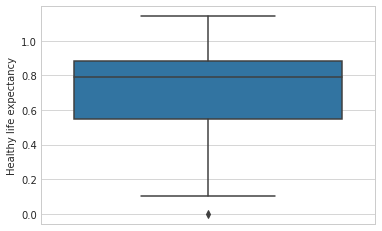

In [14]:
sns.boxplot(y=df['Healthy life expectancy'])

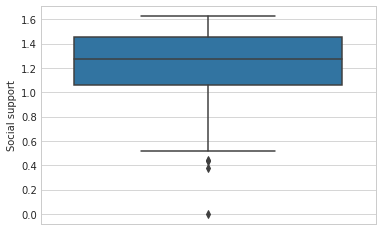

In [15]:
sns.boxplot(y=df['Social support'])

Se observaron muy pocos puntos atípicos en las 4 gráficas que se realizaron. Debido a su corta contidad, se pueden considerar como anomalías y desechar de la base de datos.

# 9.- ¿Cuáles son los resultados del modelo de regresión?

In [16]:
GDP = df['GDP per capita']
HLE = df['Healthy life expectancy']
SS = df['Social support']
score = df['Score']
cont = df['Continent']

model = ols('Score ~ GDP + HLE + SS + Continent', data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     108.4
Date:                Thu, 21 Oct 2021   Prob (F-statistic):           2.30e-43
Time:                        12:34:45   Log-Likelihood:                -131.96
No. Observations:                 156   AIC:                             273.9
Df Residuals:                     151   BIC:                             289.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3874      0.223     10.721      0.000       1.947       2.827
GDP            0.8691      0.231      3.768      0.000       0.413       1.325
HLE            0.8522      0.386      2.206      0.029       0.089       1.616
SS             1.1604      0.248      4.682      0.000       0.671       1.650
Continent      0.1226      0.041      3.006      0.003       0.042       0.203
==============================================================================
Omnibus:                        0.372   Durbin-Watson:                   1.501
Prob(Omnibus):                  0.830   Jarque-Bera (JB):                0.529
Skew:                          -0.050   Prob(JB):                        0.768
Kurtosis:                       2.733   Cond. No.                         27.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Después de obtener un modelo de regresión completo, nos arrojó un R-cuadrado y un R-cuadrado ajustado de 0.742 y 0.735. Estos coeficientes de correlacion significan un alto nivel de correlación, lo que quiere decir que nuestro modelo tiene capacidad predictiva. Esto nos dice que el modelo es capaz de predecir aproximadamente un 73% de la variabilidad en nuestra variable de respuesta. Además, valores cercanos de R-cuadrado y R-cuadrado ajustado significan certidumbre en el resultado de éstos.

Además, todas nuestras variables tienen un valor P inferior al 0.05 (alfa), lo que nos indica que todas son variables significativas. El valor de Durbin-Watson también nos indica que tenemos un modelo aceptable.

Teniendo esto en cuenta, nuestro modelo de regresión es el siguiente:

Score = 2.3874 + (0.8691 x GDP per capita) + (0.8522 * Healthy life expectancy) + (1.1604 x Social support) + (0.1226 x Continent)

# 10.- Gráficas adicionales

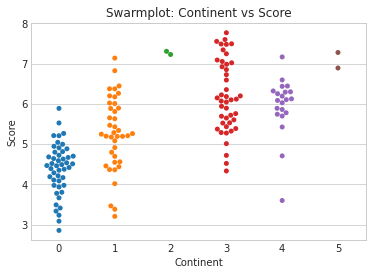

In [17]:
sns.swarmplot(x = 'Continent',
              y = 'Score',
              data = df)
plt.title('Swarmplot: Continent vs Score')
plt.show()

El impacto del continente en el que la gente vive es un factor importante, pues las condiciones económicas y sociales de unos son más favorecidas que otros continentes. Los números representan los siguientes continentes:
0 = Africa, 1 = Asia, 2 = Oceanía, 3 = Europa, 4 = Latinoamérica, 5 = Norteamérica

# 11.- Conclusiones generales

Después de haber realizado toda esta investigación, me llevo aprendizajes interesantes que me ayudan a comprender de qué comprende, de manera general, la percepción de la felicidad y cómo se ve afectada dependiendo de diferentes factores como los que se estudiaron previamente. A lo largo del mundo, sobretodo por factores socioeconómicos, la percepción de la felicidad varía ampliamente y gracias a este estudio fue posible identificar esas variables que ocasionan el cambio en dicha percepción. 